In [1]:
%%time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
#import tensorflow.keras.utils.to_categorical
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.layers import LeakyReLU
from emnist import extract_training_samples
from emnist import extract_test_samples
from tensorflow.keras import utils
from matplotlib import pyplot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import time
import os
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


CPU times: user 2.29 s, sys: 1.51 s, total: 3.8 s
Wall time: 37.5 s


In [2]:
#Global para's

img_width, img_height = 28, 28
leaky_relu_alpha = 0.1

X_train, y_train = extract_training_samples('balanced')
X_test, y_test = extract_test_samples('balanced')

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]


'''
CNN's require a different formal of input data as compared to MLP;
this function reshapes the image data accordingly.

Reshapring for 3D cnn format since we are using black and white images, gotta made it 3dim.

'''

img_width, img_height = 28, 28

X_trainCNN, y_trainCNN = extract_training_samples('balanced')
X_testCNN, y_testCNN = extract_test_samples('balanced')

if K.image_data_format() == 'channels_first':
    X_trainCNN = X_trainCNN.reshape(X_trainCNN.shape[0], 1, img_width, img_height)
    X_testCNN = X_testCNN.reshape(X_testCNN.shape[0], 1, img_width, img_height)
    CNNinput_shape = (1, img_width, img_height)
else:
    X_trainCNN = X_trainCNN.reshape(X_trainCNN.shape[0], img_width, img_height, 1)
    X_testCNN = X_testCNN.reshape(X_testCNN.shape[0], img_width, img_height, 1)
    CNNinput_shape = (img_width, img_height, 1)
    
X_trainCNN = X_trainCNN / 255
X_testCNN = X_testCNN / 255
    
y_trainCNN = utils.to_categorical(y_trainCNN)
y_testCNN = utils.to_categorical(y_testCNN)

In [3]:
'''
Image rotation of 40 degree's (minics difference angles of writing)
Shear, Vertical, Horizontal shifts by 0.08 (minic displacements and cursive fonts)
Zoom's in by 0.08 (minics alphabets size difference)

'''

img_gen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=40,
    #shear_range = 30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #zoom_range = [-0.5,0.5],
    horizontal_flip=False)

In [4]:
'''
An example of how the image augmentation function can affect our data.
'''

def gallery(array, ncols=3):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols)
    result = (array.reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
    return result


distorted = np.empty(shape = (0,28,28), dtype = "uint8")
i = 0
for batch in img_gen.flow(X_trainCNN[[4]]*255, batch_size=1,):
    i += 1
    pd
    distorted = np.append(distorted, batch.reshape((28,28)).astype("uint8"))
    if i > 20:
        break
distorted = distorted.reshape((21,28,28))



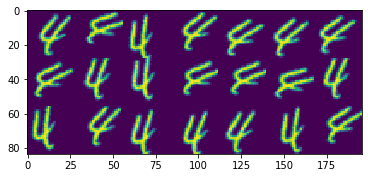

In [5]:
plt.imshow(gallery(distorted, ncols = 7))


In [6]:

def conv_modelA():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3,input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [7]:
CNN_modelA = conv_modelA()

In [8]:

%%time
# No augmented Data

CNNHistoryA = CNN_modelA.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=75, batch_size=100, verbose=2)
CNN_scoresA = CNN_modelA.evaluate(X_testCNN, y_testCNN, verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scoresA[1]*100))
print(f'Test loss for base CNN: {CNN_scoresA[0]} / Test accuracy: {CNN_scoresA[1]}')

Epoch 1/75
1128/1128 - 86s - loss: 1.0813 - accuracy: 0.6846 - val_loss: 0.4525 - val_accuracy: 0.8462
Epoch 2/75
1128/1128 - 90s - loss: 0.5394 - accuracy: 0.8189 - val_loss: 0.3904 - val_accuracy: 0.8652
Epoch 3/75
1128/1128 - 90s - loss: 0.4686 - accuracy: 0.8401 - val_loss: 0.4038 - val_accuracy: 0.8599
Epoch 4/75
1128/1128 - 87s - loss: 0.4352 - accuracy: 0.8488 - val_loss: 0.3640 - val_accuracy: 0.8746
Epoch 5/75
1128/1128 - 86s - loss: 0.4167 - accuracy: 0.8543 - val_loss: 0.3381 - val_accuracy: 0.8810
Epoch 6/75
1128/1128 - 85s - loss: 0.3976 - accuracy: 0.8617 - val_loss: 0.3352 - val_accuracy: 0.8834
Epoch 7/75
1128/1128 - 85s - loss: 0.3859 - accuracy: 0.8643 - val_loss: 0.3296 - val_accuracy: 0.8854
Epoch 8/75
1128/1128 - 88s - loss: 0.3756 - accuracy: 0.8675 - val_loss: 0.3213 - val_accuracy: 0.8870
Epoch 9/75
1128/1128 - 85s - loss: 0.3667 - accuracy: 0.8703 - val_loss: 0.3256 - val_accuracy: 0.8862
Epoch 10/75
1128/1128 - 85s - loss: 0.3598 - accuracy: 0.8728 - val_loss:

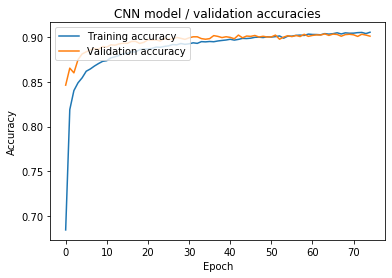

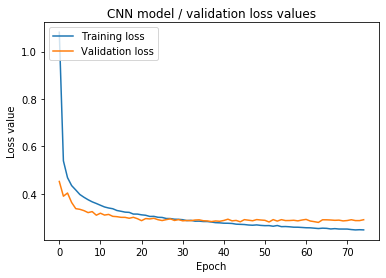

In [9]:
plt.plot(CNNHistoryA.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistoryA.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistoryA.history['loss'], label='Training loss')
plt.plot(CNNHistoryA.history['val_loss'], label='Validation loss')
plt.title('CNN model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [15]:
import seaborn as sns
import sklearn
import sklearn.metrics
import sklearn.model_selection

In [18]:
%%time
y_pred = CNN_modelA.predict_classes(X_testCNN)

CPU times: user 23.6 s, sys: 970 ms, total: 24.6 s
Wall time: 12.8 s


In [31]:
ascii_class_mapping = pd.read_csv('emnist-balanced-mapping.txt', sep=' ', header=None,).set_index(keys=0).squeeze().apply(chr).to_dict()

In [23]:
confusion_matrix = sklearn.metrics.confusion_matrix(
    y_true=np.argmax(y_testCNN, axis=1),
    y_pred = y_pred,
    normalize='true',
)

precision = sklearn.metrics.precision_score(
    y_true=np.argmax(y_testCNN, axis=1),
    y_pred=y_pred,
    average=None,
 )

recall = sklearn.metrics.recall_score(
    y_true=np.argmax(y_testCNN, axis=1),
    y_pred=y_pred,
    average=None,
)


In [29]:
ascii_class_mapping

{}

In [32]:
marginals_df = pd.DataFrame({
    'class': ascii_class_mapping.values(),
    'precision': precision,
    'recall': recall,
})

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


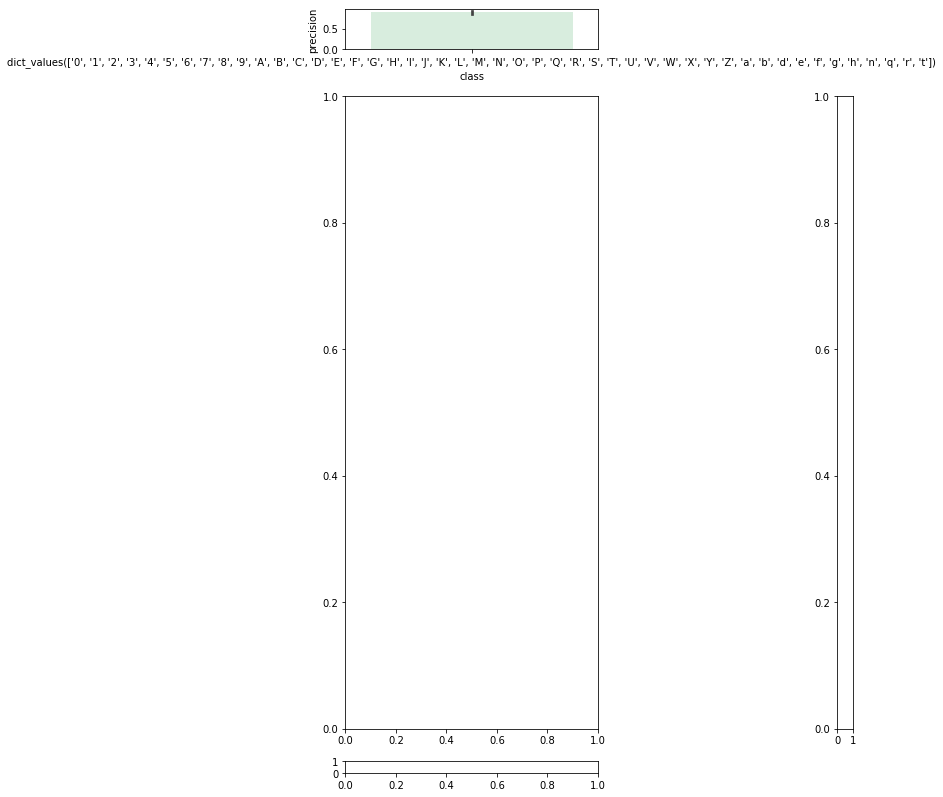

In [33]:


fig = plt.figure(constrained_layout=True)
fig.set_size_inches(h=11, w=10)
gs = fig.add_gridspec(
    nrows=3, ncols=2, width_ratios=[16,1], height_ratios=[1,16, 0.3],
    wspace=0.01, hspace=0.01
)
marg_x_ax = fig.add_subplot(gs[0, :-1])
marg_y_ax = fig.add_subplot(gs[1:-1, -1])
joint_ax = fig.add_subplot(gs[1:-1, 0:-1])
cbar_ax = fig.add_subplot(gs[-1,:-1])

default_color = sns.color_palette('mako', 50)[-1]
accent_color = sns.color_palette('mako', 30)[-5]

sns.barplot(
    data=marginals_df,
    y='precision',
    x='class',
    ax=marg_x_ax,
    color=default_color,
)

In [35]:

    
marg_x_ax.set_title('Precision', size='small')
marg_x_ax.get_xaxis().set_visible(False)
marg_x_ax.get_yaxis().set_visible(False)
marg_x_ax.axhline(y=1, color=accent_color, dashes=(5,3), label='100%')
sns.despine(ax=marg_x_ax, left=True, bottom=True)

sns.barplot(
    data=marginals_df,
    x='recall',
    y='class',
    ax=marg_y_ax,
    color=default_color,
)
marg_y_ax.set_title('Recall', size='small')
marg_y_ax.get_xaxis().set_visible(False)
marg_y_ax.get_yaxis().set_visible(False)
marg_y_ax.axvline(x=1, color=accent_color, dashes=(5,3), label='100%')
sns.despine(ax=marg_y_ax, left=True, bottom=True)

sns.heatmap(
    confusion_matrix,
    ax=joint_ax,
    xticklabels=ascii_class_mapping.values(),
    yticklabels=ascii_class_mapping.values(),
    cmap='mako_r',
    cbar=True,
    cbar_ax=cbar_ax,
    cbar_kws={
        'orientation': 'horizontal',
        'shrink' : 0.7,
        'fraction': 0.05,
        'aspect': 40,
    },
    annot=False,
    fmt='.1f',
    annot_kws={
        'alpha': 0.8,
        'fontsize': 10,
    },
    # square=True,
    linecolor='white',
    linewidth=0.004,
)  
joint_ax.tick_params(bottom=False, left=False, labeltop=True, labelright=True, labelrotation=0.0)
joint_ax.set_ylabel('True class label', size='medium', labelpad=10)
joint_ax.set_xlabel('Predicted class label', size='medium', labelpad=10)

cbar_ax.set_xlabel('True proportion identified', size='small')
fig.suptitle('CNN Classifier Confusion Matrix', size='xx-large', va='top', )

TypeError: float() argument must be a string or a number, not 'dict_values'

In [38]:
sns.heatmap(
    confusion_matrix,
    ax=joint_ax,
    xticklabels=ascii_class_mapping.values(),
    yticklabels=ascii_class_mapping.values(),
    cmap='mako_r',
    cbar=True,
    cbar_ax=cbar_ax,
    cbar_kws={
        'orientation': 'horizontal',
        'shrink' : 0.7,
        'fraction': 0.05,
        'aspect': 40,
    },
    annot=False,
    fmt='.1f',
    annot_kws={
        'alpha': 0.8,
        'fontsize': 10,
    },
    # square=True,
    linecolor='white',
    linewidth=0.004,
)  
joint_ax.tick_params(bottom=False, left=False, labeltop=True, labelright=True, labelrotation=0.0)
joint_ax.set_ylabel('True class label', size='medium', labelpad=10)
joint_ax.set_xlabel('Predicted class label', size='medium', labelpad=10)

cbar_ax.set_xlabel('True proportion identified', size='small')
fig.suptitle('CNN Classifier Confusion Matrix', size='xx-large', va='top', )
fig.show()

In [55]:
def show_confusion(CNN_modelA):
  with sns.axes_style('white'):

    # calculations
    y_pred = y_pred = CNN_modelA.predict_classes(X_testCNN)

    confusion_matrix = sklearn.metrics.confusion_matrix(
        y_true=np.argmax(y_testCNN, axis=1),
        y_pred = y_pred,
        normalize='true',
    )

    precision = sklearn.metrics.precision_score(
        y_true=np.argmax(y_testCNN, axis=1),
        y_pred=y_pred,
        average=None,
    )

    recall = sklearn.metrics.recall_score(
        y_true=np.argmax(y_testCNN, axis=1),
        y_pred=y_pred,
        average=None,
    )

    marginals_df = pd.DataFrame({
        
      'class': np.array(list(ascii_class_mapping.values())),
      'precision': precision,
      'recall': recall,
    })

    fig = plt.figure(constrained_layout=True)
    fig.set_size_inches(h=11, w=10)
    gs = fig.add_gridspec(
      nrows=3, ncols=2, width_ratios=[16,1], height_ratios=[1,16, 0.3],
      wspace=0.01, hspace=0.01
    )
    marg_x_ax = fig.add_subplot(gs[0, :-1])
    marg_y_ax = fig.add_subplot(gs[1:-1, -1])
    joint_ax = fig.add_subplot(gs[1:-1, 0:-1])
    cbar_ax = fig.add_subplot(gs[-1,:-1])

    default_color = sns.color_palette('mako', 50)[-1]
    accent_color = sns.color_palette('mako', 30)[-5]

    sns.barplot(
        data=marginals_df,
        y='precision',
        x='class',
        ax=marg_x_ax,
        color=default_color,
    )
    marg_x_ax.set_title('Precision', size='small')
    marg_x_ax.get_xaxis().set_visible(False)
    marg_x_ax.get_yaxis().set_visible(False)
    marg_x_ax.axhline(y=1, color=accent_color, dashes=(5,3), label='100%')
    sns.despine(ax=marg_x_ax, left=True, bottom=True)

    sns.barplot(
        data=marginals_df,
        x='recall',
        y='class',
        ax=marg_y_ax,
        color=default_color,
    )
    marg_y_ax.set_title('Recall', size='small')
    marg_y_ax.get_xaxis().set_visible(False)
    marg_y_ax.get_yaxis().set_visible(False)
    marg_y_ax.axvline(x=1, color=accent_color, dashes=(5,3), label='100%')
    sns.despine(ax=marg_y_ax, left=True, bottom=True)

    sns.heatmap(
        confusion_matrix,
        ax=joint_ax,
        xticklabels=ascii_class_mapping.values(),
        yticklabels=ascii_class_mapping.values(),
        cmap='mako_r',
        cbar=True,
        cbar_ax=cbar_ax,
        cbar_kws={
            'orientation': 'horizontal',
            'shrink' : 0.7,
            'fraction': 0.05,
            'aspect': 40,
        },
        annot=False,
        fmt='.1f',
        annot_kws={
            'alpha': 0.8,
            'fontsize': 10,
        },
        # square=True,
        linecolor='white',
        linewidth=0.004,
    )  
    joint_ax.tick_params(bottom=False, left=False, labeltop=True, labelright=True, labelrotation=0.0)
    joint_ax.set_ylabel('True class label', size='medium', labelpad=10)
    joint_ax.set_xlabel('Predicted class label', size='medium', labelpad=10)

    cbar_ax.set_xlabel('True proportion identified', size='small')
    fig.suptitle('CNN Classifier Confusion Matrix', size='xx-large', va='top', )

  return fig

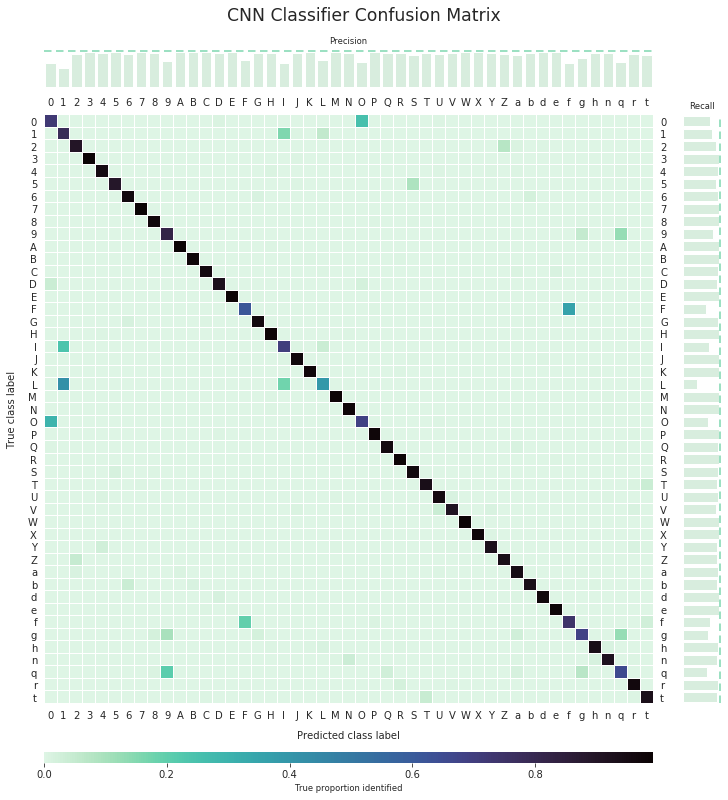

In [56]:
fig = show_confusion(CNN_modelA)